<div style="background:#5D6D7E;padding:20px;color:#ffffff;margin-top:10px;">

# NLP - Práctica 3 (Clasificación de Textos) 

## Profesora: Lisibonny Beato
# Natasha López
# Moisés Rodríguez
### Período 3-2023-2024</div>


In [65]:
# Importando algunas librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import string
import re




# Librerias para graficar los arboles

import graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
from IPython.display import Image, Markdown
from sklearn.metrics import roc_curve, roc_auc_score

<div style="background:#ff6242;padding:20px;color:#ffffff;margin-top:10px;">
<b>El propósito de esta asignación es que el estudiante cree varios modelos de clasificación sobre un corpus textual, evaluando el desempeño de cada uno y seleccionando el que mejor de respuesta a la tarea<br />
<br />
    Para esta práctica estarán utilizando el dataset <i>IMDB Dataset.csv</i> que encontrarán en la carpeta correspondiente de la PVA.
<br />
<br />
Es importante que realicen un análisis detallado para cada modelo construido y que realicen una comparativa final, argumentando adecuadamente las razones de que se elija finalmente uno de los modelos sobre los otros.</b>
</div>


## 1. Nivel Básico 
### Puntuación máxima de la tarea: 5 puntos
#### 1.1 Limpieza y preparación de los datos, tomando en cuenta que el dataset continue una valoración sentimental que los usuarios hacen acerca de películas en el sitio IMDB. 
#### 1.2 Representar los documentos como vectores BOW
#### 1.3 Construcción de un modelo de clasificación bayesiano
#### 1.4 Construcción de un modelo basado en regresión logística
#### 1.5 Construcción de un modelo basado en árboles decisorios 
#### Nota: Para los todos los modelos debe realizar un análisis de las métricas de desempeño, sobre los modelos construidos con una partición de los datos para training y otra para testing.

In [13]:
pd.set_option('display.max_colwidth', 20000)
pd.options.display.max_rows=100

In [14]:
df = pd.read_csv('IMDB Dataset.csv')

In [15]:
df['review']

0        One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [16]:
df = df[['review', 'sentiment']]

In [17]:
# Esto es para ver cuales son los valores unicos de la columna sentiment
print(df['sentiment'].unique())

['positive' 'negative']


In [18]:
# Esto es para cambiar los valores de la columna sentiment a 1 y 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [19]:
df

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, f

In [22]:
# Descargar las stopwords de nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from bs4 import BeautifulSoup 

stopwords = _stop_words.ENGLISH_STOP_WORDS

def clean(doc):
    # BeautifulSoup para eliminar etiquetas HTML
    soup = BeautifulSoup(doc, "html.parser")
    text = soup.get_text()
    text = "".join([char for char in text if char not in string.punctuation and not char.isdigit()])
    text = " ".join([token for token in text.split() if token not in stopwords])
    
    return text 

In [23]:
df['review'] = df['review'].apply(clean)

/tmp/ipykernel_27818/1710898069.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")


In [24]:
df

,review,sentiment
0,One reviewers mentioned watching just Oz episode youll hooked They right exactly happened meThe thing struck Oz brutality unflinching scenes violence set right word GO Trust faint hearted timid This pulls punches regards drugs sex violence Its hardcore classic use wordIt called OZ nickname given Oswald Maximum Security State Penitentary It focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements far awayI say main appeal fact goes shows wouldnt dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ doesnt mess The episode I saw struck nasty surreal I say I ready I watched I developed taste Oz got accustomed high levels graphic violence Not just violence injustice crooked guards wholl sold nickel inmates wholl kill order away mannered middle class inmates turned prison bitches lack street skills prison experience Watching Oz comfortable uncomfortable viewingthats touch darker,1
1,A wonderful little production The filming technique unassuming oldtimeBBC fashion gives comforting discomforting sense realism entire piece The actors extremely chosen Michael Sheen got polari voices pat You truly seamless editing guided references Williams diary entries worth watching terrificly written performed piece A masterful production great masters comedy life The realism really comes home little things fantasy guard use traditional dream techniques remains solid disappears It plays knowledge senses particularly scenes concerning Orton Halliwell sets particularly flat Halliwells murals decorating surface terribly,1
2,I thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy The plot simplistic dialogue witty characters likable bread suspected serial killer While disappointed realize Match Point Risk Addiction I thought proof Woody Allen fully control style grown loveThis Id laughed Woodys comedies years dare I say decade While Ive impressed Scarlet Johanson managed tone sexy image jumped right average spirited young womanThis crown jewel career wittier Devil Wears Prada interesting Superman great comedy friends,1
3,Basically theres family little boy Jake thinks theres zombie closet parents fighting timeThis movie slower soap opera suddenly Jake decides Rambo kill zombieOK youre going make film Decide thriller drama As drama movie watchable Parents divorcing arguing like real life And Jake closet totally ruins film I expected BOOGEYMAN similar movie instead watched drama meaningless thriller spots just playing parents descent dialogs As shots Jake just ignore,0
4,Petter Matteis Love Time Money visually stunning film watch Mr Mattei offers vivid portrait human relations This movie telling money power success people different situations encounter This variation Arthur Schnitzlers play theme director transfers action present time New York different characters meet connect Each connected way person know previous point contact Stylishly film sophisticated luxurious look We taken people live world live habitatThe thing gets souls picture different stages loneliness inhabits A big city exactly best place human relations fulfillment discerns case people encounterThe acting good Mr Matteis direction Steve Buscemi Rosario Dawson Carol Kane Michael Imperioli Adrian Grenier rest talented cast make characters come aliveWe wish Mr Mattei good luck await anxiously work,1
...,...,...
49995,I thought movie did right good job It wasnt creative original expecting It lotta fun think like comes DVD Im going pay money proudly cent Sharon Stone great movie horribleCatwoman movie isnt movies underrated lifetime probably classic like yrs Dont wait classic watch enjoy Dont expect masterpiece thats gripping soul touching just allow life involved theirsAll movie entertaining recomme

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
BOW
</div>

In [25]:
# BOW (Bag of Words) o Bolsa de palabras
# Llamando al constructor
bow_vectorizer=CountVectorizer(binary=False)
# Transformar los documentos a ese formato
data_bow=bow_vectorizer.fit_transform(df['review'])

In [26]:
# Palabras del vocabulario
print(bow_vectorizer.get_feature_names_out())

['aa' 'aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' ... 'četvorka' 'יגאל' 'כרמון']


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Clasificacion bayesiano
</div>

In [27]:
X = df.review # Datos del texto
y = df.sentiment #Columna que es la clase
# Vectorizar los textos en conjunto
vectorizador=CountVectorizer(preprocessor=clean) # Constructor
X_vc = vectorizador.fit_transform(X)

In [28]:
print(X.shape, y.shape)

(50000,) (50000,)


In [29]:
# Paso 1. Haciendo un split de los datos

X_train, X_test, y_train, y_test = train_test_split(X_vc,y,test_size=0.3, stratify=y, random_state=1)

In [30]:
print(X_train.shape, X_test.shape)

(35000, 248971) (15000, 248971)


In [31]:
print(y_train.shape, y_test.shape)

(35000,) (15000,)


In [32]:
#Paso 2. Vectorizar cada articulo y limpiarlo antes de que lo vectorice
X_train_vc = X_train # Esto para entender que estan limpios y vectorizados, pero ya se hizo antes del paso uno
X_test_vc = X_test # Esto para entender que estan limpios y vectorizados, pero ya se hizo antes del paso uno

In [33]:
print(X_train_vc.shape, X_test_vc.shape)

(35000, 248971) (15000, 248971)


In [34]:
# Mostrar los nombre de los features
print(vectorizador.get_feature_names_out())

['AA' 'AAA' 'AAAAAAAAAAAAHHHHHHHHHHHHHH' ... 'čETVORKA' 'יגאל' 'כרמון']


In [35]:
# Paso 3. Entrenar clasificador con naive bayes usando el training ser y probando sobre el test set
nb = MultinomialNB()
nb.fit(X_train_vc, y_train)
y_pred_class = nb.predict(X_test_vc)

In [36]:
y_pred_class

array([0, 1, 1, ..., 0, 1, 1])

In [37]:
# Evaluando modelo
y_test.value_counts()

sentiment
0    7500
1    7500
Name: count, dtype: int64

In [38]:
accuracy_score(y_test,y_pred_class) # Accuracy general del modelo

0.8596

In [39]:
# Matriz de confusion
cm=confusion_matrix(y_test,y_pred_class) 

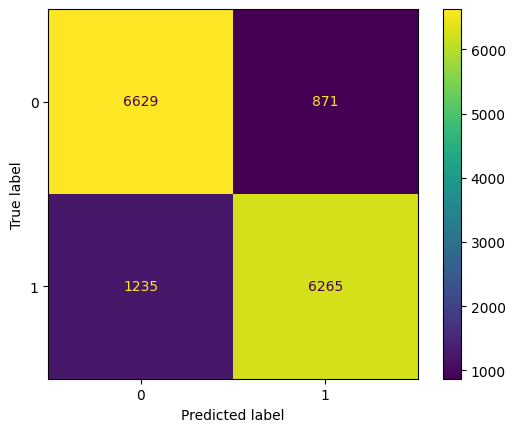

In [40]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=nb.classes_)
disp.plot()
plt.show()

In [41]:
# Reporte de clasificacion
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7500
           1       0.88      0.84      0.86      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Regresion logica
</div>

In [42]:
print(len(y_test) / (2* y_test.value_counts()[0]))
print(len(y_test) / (2* y_test.value_counts()[1]))

1.0
1.0


In [43]:
lr = LogisticRegression(class_weight={0:0.61, 1:2.81}, max_iter=5000)
lr.fit(X_train_vc, y_train)
y_pred_class = lr.predict(X_test_vc)
y_pred_class

array([0, 1, 1, ..., 1, 1, 1])

In [60]:
# Accuracy
accuracy_score(y_test,y_pred_class) # Accuracy general del modelo

0.821

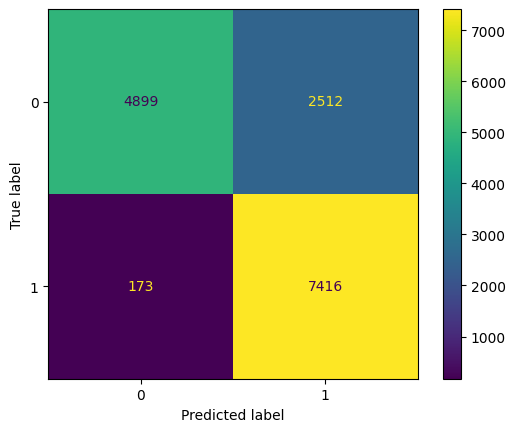

In [61]:
# Matriz de confusion
cm=confusion_matrix(y_test,y_pred_class) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=nb.classes_)
disp.plot()
plt.show()

In [62]:
# Reporte de clasificacion
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.66      0.78      7411
           1       0.75      0.98      0.85      7589

    accuracy                           0.82     15000
   macro avg       0.86      0.82      0.82     15000
weighted avg       0.86      0.82      0.82     15000



<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Arboles decisorios
</div>

In [47]:
rf=RandomForestClassifier(max_depth=50)
rf.fit(X_train_vc,y_train)
y_predict_class= rf.predict(X_test_vc)
y_predict_class

array([0, 1, 1, ..., 0, 1, 1])

In [48]:
# Desempenio general del modelo
accuracy_score(y_test,y_predict_class)

0.8495333333333334

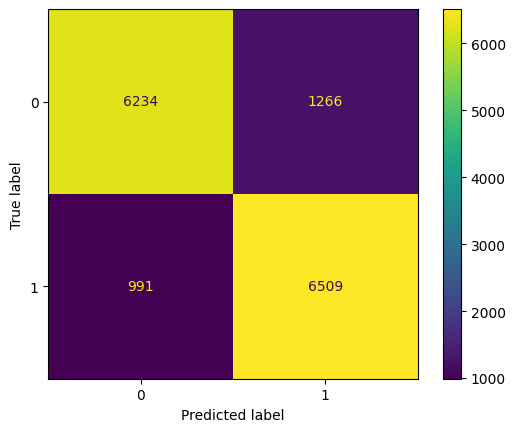

In [49]:
# Desempenio por clase
cm=confusion_matrix(y_test,y_predict_class)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

In [50]:
print(classification_report(y_test,y_predict_class))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      7500
           1       0.84      0.87      0.85      7500

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



## 2. Nivel Intermedio 
### Puntuación máxima de la tarea: 3 puntos
#### 2.1 Investigue acerca del concepto de  validación cruzada en clasificación y escriba sobre el tema en no más de dos párrafos (adicionalmente, puede colocar una imagen, si así lo desea)
#### 2.2 Investigue las funciones de la librería Scikit Learn que ayudan a realizar validación cruzada y descríbalas en detalle.
#### 2.3 Construya los mismos modelos del punto anterior, pero ahora con un esquema de prueba basado en validación cruzada y realice un análisis de las métricas de desempeño de cada uno

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<h2>#2.1</h2>
<p>
La validacion cruzada es un metodo de aprendizaje automatico evualando los datos que no se han visto. Este consiste en dividir los datos disponibles en varios subconjuntos, que se pueden denominar pliegues, donde en cada iteración, uno de estos pliegues se usa como conjunto de validación y los demás para entrenar el modelo. Este proceso se repite múltiples veces, cambiando el pliegue de validación en cada iteración, y los resultados se promedian para obtener una estimación más robusta del rendimiento del modelo. La validación cruzada ayuda a garantizar que el modelo generalice bien a nuevos datos y no se ajuste demasiado a los datos de entrenamiento.
</p>
    <br>
<p>
La validacion cruzada cuenta con varias forma para ser aplicada, entres ellas se encuentra : K-fold que como ya se habia mencionada anteriormente  divide cada iteracion  en diferentes pliegues. Por otro lado tenemos LOOCV  (omitir una validacion Cruzada) al igual que el k-fold este usa todas las muestras menos una para el entrenamiento y repite esto para cada muestra. Por ultimo esta validacion cruzada estratificada este garantiza que cada pliegue del proceso de validación cruzada mantenga la misma distribución de clases que todo el conjunto de datos.
</p>

</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<h2>#2.2</h2>
</div>

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Este metodo es utilizado para dividir un conjunto de datos en dos subconjuntos uno para entrenamiento y otro para prueba. Aqui X representa las características del conjunto de datos y y las etiquetas correspondientes. Al ejecutar train_test_split, el un porcentaje pequeño de los datos se asignan al conjunto de prueba (X_test, y_test) y el porcentaje restante al conjunto de entrenamiento (X_train, y_train). La opción random_state asegura que la división sea reproducible al fijar la semilla del generador de números aleatorios. Aunque train_test_split es una herramienta valiosa para la validación cruzada, no es en sí misma un método de validación cruzada completa, sino más bien una técnica para preparar los datos antes de aplicar métodos de validación más complejos.
</div>

In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Este metodo se utiliza para evaluar un modelo de aprendizaje supervisado mediante validación cruzada. Este enfoque permite medir la capacidad predictiva del modelo de manera más robusta al dividir los datos en múltiples subconjuntos de entrenamiento y prueba. Un idea mas centrada de como este funciona,  este evalúa este modelo utilizando el conjunto de datos X (características) y y (etiquetas) con una validación cruzada de x pliegues, especificada por cv que este caso es 5.
</div>

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Kfold es un método que se utiliza para dividir un conjunto de datos en K pliegues distintos, lo que facilita la validación cruzada de un modelo de aprendizaje supervisado. En el ejemplo dado, KFold(n_splits=5) indica que el conjunto de datos se dividirá en 5 partes iguales. El bucle for itera sobre estos 5 pliegues, donde en cada iteración se generan índices para el conjunto de entrenamiento (train_index) y para el conjunto de prueba (test_index). Dentro del bucle, X_train y X_test se asignan a partir de X utilizando los índices generados, y de la misma manera, y_train y y_test se asignan a partir de y. El enfoque de kfold enfoque garantiza que cada observación se utilice una vez para la prueba y varias veces para el entrenamiento, proporcionando una evaluación más robusta y generalizable del rendimiento del modelo.

</div>

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
StratifiedKFold se utiliza validación cruzada estratificada en x pliegues (en este caso 5), asegurando que cada pliegue mantenga la misma proporción de clases que el conjunto de datos original. En cada iteración del bucle, los datos se dividen en conjuntos de entrenamiento y prueba, permitiendo evaluar el modelo de manera más robusta y confiable, especialmente útil para datos desbalanceados.
</div>

In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
LeaveOneOut se utiliza para realizar una validación cruzada exhaustiva donde cada observación del conjunto de datos se usa como conjunto de prueba exactamente una vez. En este caso se puede ver como se  crea una instancia  y se aplica al conjunto de datos X. El bucle for itera sobre cada división posible, donde en cada iteración un único índice se utiliza para el conjunto de prueba (test_index) y el resto para el conjunto de entrenamiento (train_index). Dentro del bucle, X_train y X_test se asignan a partir de X utilizando estos índices, y de manera similar y_train y y_test se asignan a partir de y. Esto significa que si el conjunto de datos tiene n observaciones, el modelo se entrenará n veces, cada vez con n-1 observaciones y se probará con la observación dejada fuera. Este enfoque maximiza el uso de los datos disponibles y proporciona una evaluación no sesgada del rendimiento del modelo, aunque es computacionalmente intensivo para conjuntos de datos grandes.
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X, y)


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
GridSearchCV Se encarga de optimizar hiperparámetros de modelos mediante búsqueda en cuadrícula. En este caso se aplica a un clasificador SVC, probando combinaciones de C ([0.1, 1, 10]) y kernel (linear, rbf) usando validación cruzada de 5 pliegues. grid.fit(X, y) entrena y evalúa el modelo para cada combinación, seleccionando la mejor basada en su rendimiento promedio. El mejor modelo se accede a través de grid.best_estimator_ para predicciones futuras más precisas.
</div>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {'n_estimators': randint(1, 100), 'max_depth': randint(1, 10)}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(X, y)


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
RandomizedSearchCV se utiliza para encontrar la mejor combinación de hiperparámetros para un modelo mediante una búsqueda aleatoria en el espacio de hiperparámetros especificado.En este caso podemos ver que primero, define param_dist con distribuciones de valores para n_estimators (de 1 a 100) y max_depth (de 1 a 10) usando randint de scipy.stats. Luego, crea una instancia de RandomizedSearchCV con el clasificador, param_dist, el número de iteraciones n_iter=100 y una validación cruzada de 5 pliegues (cv=5). Al ejecutar random_search.fit(X, y), se entrenan y evalúan 100 combinaciones aleatorias de hiperparámetros usando validación cruzada, dividiendo los datos en 5 partes en cada iteración para obtener una evaluación robusta. Finalmente, RandomizedSearchCV selecciona la mejor combinación de hiperparámetros basada en su rendimiento promedio en la validación cruzada
</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<h2>#2.3</h2>
</div>

In [47]:
from sklearn.model_selection import train_test_split, StratifiedKFold


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_vc, y, test_size=0.3, stratify=y, random_state=1)

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Aqui se utiliza la función train_test_split para dividir el conjunto de datos X_vc y las etiquetas y en conjuntos de entrenamiento y prueba. El 70% de los datos se asigna a X_train y y_train, y el 30% a X_test y y_test. La opción stratify=y garantiza que ambas divisiones mantengan la misma proporción de clases que el conjunto original, y random_state=1 asegura que la división sea reproducible.
</div>

In [49]:
skf = StratifiedKFold(n_splits=5)


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Aqui realizamos una validación cruzada estratificada con 5 pliegues. Esto significa que el conjunto de datos se divide en 5 subconjuntos (pliegues) de manera que cada pliegue mantiene la misma proporción de clases que el conjunto de datos original. 
</div>

In [50]:
model = RandomForestClassifier()

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
Este modelo es un conjunto de múltiples árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos, con el objetivo de mejorar la precisión y controlar el sobreajuste. Cada árbol de decisión en el bosque hace una predicción, y la predicción final del modelo es la media o la moda de las predicciones individuales de los árboles, lo que resulta en un modelo más robusto y generalizable.
</div>

In [51]:
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Entrenar el modelo con el pliegue de entrenamiento
    model.fit(X_train_fold, y_train_fold)
    
    # Evaluar el modelo con el pliegue de validación
    score = model.score(X_val_fold, y_val_fold)
    print(f'Puntaje del piegle: {score}')

# Finalmente, evaluar el modelo en el conjunto de prueba separado inicialmente
final_score = model.score(X_test, y_test)
print(f'Puntaje final: {final_score}')

Puntaje del piegle: 0.8492857142857143
Puntaje del piegle: 0.8485714285714285
Puntaje del piegle: 0.8525714285714285
Puntaje del piegle: 0.8405714285714285
Puntaje del piegle: 0.8518571428571429
Puntaje final: 0.851


<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<p>
El bucle itera sobre los índices de entrenamiento (train_index) y validación (val_index) generados por StratifiedKFold.split(X_train, y_train). En cada iteración:
</p>
<p>
X_train_fold y X_val_fold son las particiones del conjunto de características de entrenamiento (X_train) para el pliegue actual. Por otra parte estan y_train_fold y y_val_fold son las particiones del conjunto de etiquetas de entrenamiento (y_train) para el pliegue actual, usando .iloc[] para asegurar el acceso correcto a los elementos.
</p>
<p>
El modelo RandomForestClassifier se entrena usando el pliegue de entrenamiento (X_train_fold y y_train_fold).
</p>
<p>
El modelo entrenado se evalúa usando el pliegue de validación (X_val_fold y y_val_fold).
</p>
</div>

## 3. Nivel Avanzado
### Puntuación máxima de la tarea: 2 puntos
#### Investigue sobre el roc auc score y grafíquelo para el mejor modelo de los 6 que ha construido. Interprete los resultados que se visualizan.

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
<p>

</p>
</div>

ROC AUC Score: 0.95


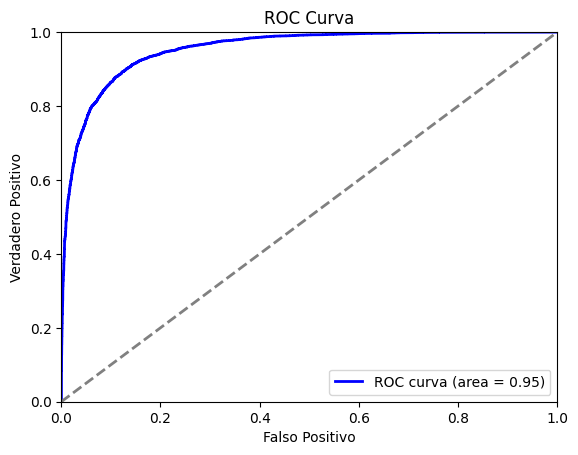

In [66]:
# Convertir el texto en vectores TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vc = vectorizer.fit_transform(X_train)
X_test_vc = vectorizer.transform(X_test)

# Crear el modelo de regresión logística 
lr.fit(X_train_vc, y_train)

# Hacer predicciones de probabilidades con los datos de prueba
y_probs = lr.predict_proba(X_test_vc)[:, 1]  # Obtener las probabilidades de la clase positiva

# Calcular el ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curva (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('ROC Curva')
plt.legend(loc="lower right")
plt.show()

